# Respaldo de Modelos y Datos

Como ya te puedes imaginar es impráctico entrenar una red cada que la vas a utilizar, sobre todo con conjuntos de datos grandes. En este notebook veremos como guardar modelos y datos. Ya sea por que vas a hacer predicciones en otro conjunto de datos o por que vas a dividir el entrenamiento en diversas etapas.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

# fc_model es propiedad de Udacity bajo licencia MIT
import fc_model

In [4]:
# Definimos una transformación de los datos
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Descargamos el conjunto de entrenamiento y cargamos mediante un dataLoader
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Descargamos el conjunto de validación
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Nuevamente estamos utilizando el fashion MNIST, 

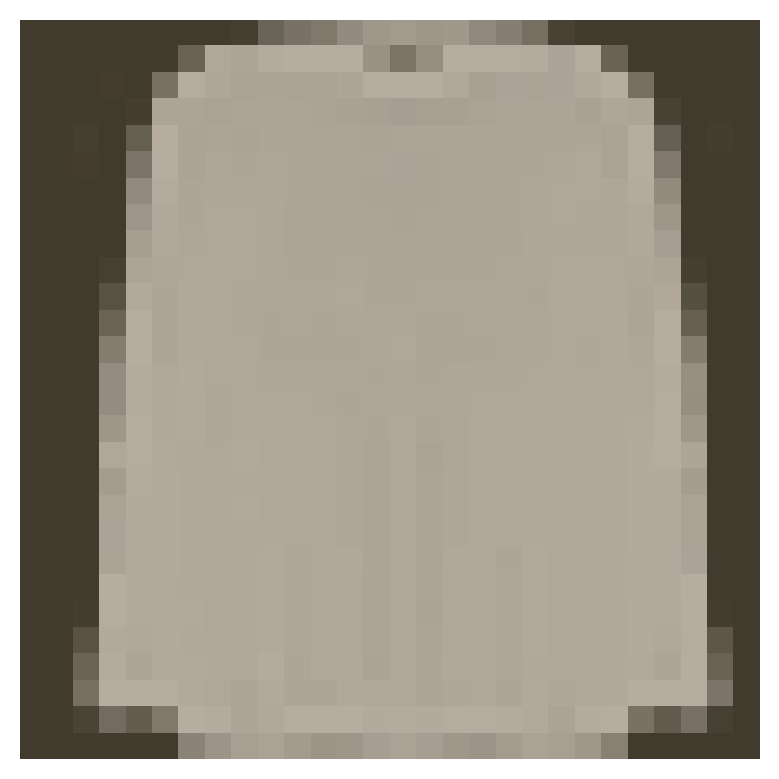

In [5]:
# visualizar los datos
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Entrenamiento

En esta ocasión el modelo de la red está definido en el archivo *fc_model*. Esto nos permite reutilizarlo en donde queramos. A continuación cargaremos el modelo y lo entrenaremos.

In [6]:
# Cargar el modelo de red, definir el criterio a utilizar y el optimizador
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.670..  Test Loss: 0.975..  Test Accuracy: 0.648
Epoch: 1/2..  Training Loss: 1.011..  Test Loss: 0.741..  Test Accuracy: 0.713
Epoch: 1/2..  Training Loss: 0.867..  Test Loss: 0.680..  Test Accuracy: 0.737
Epoch: 1/2..  Training Loss: 0.801..  Test Loss: 0.621..  Test Accuracy: 0.758
Epoch: 1/2..  Training Loss: 0.759..  Test Loss: 0.600..  Test Accuracy: 0.767
Epoch: 1/2..  Training Loss: 0.697..  Test Loss: 0.605..  Test Accuracy: 0.778
Epoch: 1/2..  Training Loss: 0.715..  Test Loss: 0.581..  Test Accuracy: 0.781
Epoch: 1/2..  Training Loss: 0.656..  Test Loss: 0.578..  Test Accuracy: 0.777
Epoch: 1/2..  Training Loss: 0.712..  Test Loss: 0.555..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.670..  Test Loss: 0.559..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.613..  Test Loss: 0.547..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.652..  Test Loss: 0.564..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.640..  Test Loss: 0.5

## Respaldo y carga

Los parámetros, pesos y sesgos, de redes creadas en PyTorch se almacenan en un objeto state_dict. Veamos que contiene el objeto para la red que cargamos.


In [8]:
print("Modelo: \n\n", model, '\n')
print("State dict keys: \n\n", model.state_dict().keys())

Modelo: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

State dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


La forma más sencilla es simplemente guardar el objeto static_dict. En este caso, podemos guardarlo a un archivo "respaldo.pth" usando *torch.save*


In [9]:
torch.save(model.state_dict(), 'respaldo.pth')

Y obviamente la operación contraria es cargarlo.

In [10]:
state_dict = torch.load('respaldo.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


Para insertar los parámetros en la red es necesario hacer `model.load_state_dict(state_dict)`.

In [11]:
model.load_state_dict(state_dict)

<All keys matched successfully>

## Diferente arquitectura

En el ejemplo anterior parace que todo funciona bien, sin embargo, el ejemplo está limitado a casos cuando la arquitectura en la que se cargan los parámetros es exactamente igual a la arquitectura entrenada. Para casos más generales es necesario también almacenar información de la arquitectura. Esto último se realiza con un diccionario.

In [12]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [13]:
# función para cargar el modelo
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [14]:
# cargar parámetros a la red
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
